In [1]:
import numpy as np
import pandas as pd


N_FOLDS = 5

oof_df = pd.read_parquet('cache/new_oof_ensemble.parquet')
print(oof_df.shape)

oof_df.head()

(31992957, 42)


,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_32,f_33,id,class,begin,end,kfold,predictionstring,idx,overlap
0,1.0,0.183223,0.185430,0.996201,0.996201,0.996201,0.996201,0.996201,0.996201,0.996201,...,0.790287,0.668874,4AB030046F42,Evidence,83,84,0,83,0,0.011628
1,2.0,0.183223,0.187638,0.996201,0.996581,0.996961,0.997341,0.997721,0.998101,0.998481,...,0.790287,0.668874,4AB030046F42,Evidence,83,85,0,83 84,1,0.023256
2,3.0,0.183223,0.189845,0.996201,0.996961,0.997721,0.998481,0.998793,0.999105,0.999417,...,0.790287,0.668874,4AB030046F42,Evidence,83,86,0,83 84 85,2,0.034884
3,4.0,0.183223,0.192053,0.996201,0.997341,0.998481,0.998949,0.999417,0.999611,0.999805,...,0.790287,0.668874,4AB030046F42,Evidence,83,87,0,83 84 85 86,3,0.046512
4,5.0,0.183223,0.194260,0.996201,0.997721,0.998793,0.999417,0.999583,0.999712,0.999805,...,0.790287,0.668874,4AB030046F42,Evidence,83,88,0,83 84 85 86 87,4,0.058140


In [2]:
gt_df = pd.read_csv("../train_folds.csv")
print(gt_df.shape)
gt_df.head()

(144293, 9)


,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring,kfold
0,423A1CA112E2,1.622628e+12,8.0,229.0,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...,1
1,423A1CA112E2,1.622628e+12,230.0,312.0,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59,1
2,423A1CA112E2,1.622628e+12,313.0,401.0,Some certain areas in the United States ban ph...,Evidence,Evidence 1,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75,1
3,423A1CA112E2,1.622628e+12,402.0,758.0,"When people have phones, they know about certa...",Evidence,Evidence 2,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...,1
4,423A1CA112E2,1.622628e+12,759.0,886.0,Driving is one of the way how to get around. P...,Claim,Claim 1,139 140 141 142 143 144 145 146 147 148 149 15...,1


In [3]:
oof_df = oof_df.drop("kfold", axis=1).merge(gt_df[["id", "kfold"]].drop_duplicates(), on="id", how="left")

oof_df["kfold"].isnull().mean()

0.0

In [4]:
from utils import score_feedback_comp


score_feedback_comp(oof_df[oof_df["f_7"] > 0.9999], gt_df, return_class_scores=True)

(0.0033459303983092437,
 {'Claim': 0.0,
  'Concluding Statement': 0.0,
  'Counterclaim': 0.0,
  'Evidence': 0.010674047795407586,
  'Lead': 0.012747464992757121,
  'Position': 0.0,
  'Rebuttal': 0.0})

In [5]:
oof_df["begin"] = oof_df["predictionstring"].apply(lambda x: int(str(x).split()[0]))
#oof_df["end"] = oof_df["predictionstring"].apply(lambda x: int(str(x).split()[-1]))
#oof_df["len"] = oof_df["end"] - oof_df["begin"] + 1
#oof_df["loc"] = (oof_df["begin"] + oof_df["end"]) / 2

oof_df = oof_df.sort_values(["id", "begin"]).reset_index(drop=True)
oof_df.head(20)

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_32,f_33,id,class,begin,end,predictionstring,idx,overlap,kfold
0,1.0,0.0,0.003984,0.934854,0.934854,0.934854,0.934854,0.934854,0.934854,0.934854,...,0.533865,0.741036,0000D23A521A,Lead,0,1,0,23028993,0.0,3
1,2.0,0.0,0.007968,0.835279,0.851875,0.868470,0.885066,0.901662,0.918258,0.934854,...,0.533865,0.741036,0000D23A521A,Lead,0,2,0 1,23028994,0.0,3
2,3.0,0.0,0.011952,0.835279,0.841012,0.846746,0.852479,0.879938,0.907396,0.934854,...,0.533865,0.741036,0000D23A521A,Lead,0,3,0 1 2,23028995,0.0,3
3,4.0,0.0,0.015936,0.835279,0.843879,0.852479,0.859843,0.867206,0.901030,0.934854,...,0.533865,0.741036,0000D23A521A,Lead,0,4,0 1 2 3,23028996,0.0,3
4,5.0,0.0,0.019920,0.835279,0.846746,0.857388,0.867206,0.870778,0.893327,0.934854,...,0.533865,0.741036,0000D23A521A,Lead,0,5,0 1 2 3 4,23028997,0.0,3
5,6.0,0.0,0.023904,0.835279,0.849613,0.862297,0.867804,0.869789,0.882945,0.934854,...,0.533865,0.741036,0000D23A521A,Lead,0,6,0 1 2 3 4 5,23028998,0.0,3
6,7.0,0.0,0.027888,0.835279,0.852479,0.863708,0.867206,0.868401,0.872564,0.934854,...,0.533865,0.741036,0000D23A521A,Lead,0,7,0 1 2 3 4 5 6,23028999,0.0,3
7,8.0,0.0,0.031873,0.835279,0.854351,0.864874,0.867804,0.870732,0.872453,0.934854,...,0.533865,0.741036,0000D23A521A,Lead,0,8,0 1 2 3 4 5 6 7,23029000,0.0,3
8,9.0,0.0,0.035857,0.835279,0.856222,0.866040,0.868401,0.871124,0.872342,0.934854,...,0.533865,0.741036,0000D23A521A,Lead,0,9,0 1 2 3 4 5 6 7 8,23029001,0.0,3
9,10.0,0.0,0.039841,0.835279,0.858094,0.867206,0.869229,0.870736,0.872231,0.934854,...,0.533865,0.741036,0000D23A521A,Lead,0,10,0 1 2 3 4 5 6 7 8 9,23029002,0.0,3


In [6]:
oof_df["target"] = oof_df["overlap"] >= 0.5
oof_df["target"].mean()

0.35639825352811244

In [7]:
discourse_types = gt_df["discourse_type"].unique()

In [8]:

#for dtype in discourse_types:
#    oof_df["x"] = oof_df["avg_score"]*(oof_df["class"] == dtype)
#    oof_df[f"sum_{dtype}"] = oof_df.groupby("id")["x"].transform("sum")

#oof_df.drop("x", axis=1, inplace=True)

#oof_df.head()

In [9]:
from tqdm import tqdm
import os

def read_texts(directory):
    names, texts = [], []
    for f in tqdm(list(os.listdir(directory))):
        names.append(f.replace('.txt', ''))
        texts.append(open(directory + f, 'r').read())
    df = pd.DataFrame({'id': names, 'full_text': texts})
    return df

#text_df = read_texts("data/train/")
#print(text_df.shape)
#text_df.head()

#oof_df = oof_df.merge(text_df, on="id", how="left")

#oof_df["loc_rate"] = oof_df["loc"] / oof_df["full_text"].apply(lambda x: len(x.split()))

In [10]:
features_dict = {'Lead': [f"f_{i}" for i in range(34)],
 'Position': [f"f_{i}" for i in range(34)],
 'Evidence': [f"f_{i}" for i in range(20)],
 'Claim': [f"f_{i}" for i in range(20)],
 'Concluding Statement': [f"f_{i}" for i in range(34)],
 'Counterclaim': [f"f_{i}" for i in range(17)] + [f"f_{i}" for i in range(27, 34)],
 'Rebuttal': [f"f_{i}" for i in range(17)]}


target = "target"

In [11]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score, f1_score




param = {'objective': 'reg:logistic',
         'eval_metric': "auc",
         'learning_rate': 0.05,
         'max_depth': 4,
         "min_child_weight": 200,
         "colsample_bynode": 0.8,
         "subsample": 0.5,
         "tree_method": 'gpu_hist', "gpu_id": 1
    }

y_oof = np.zeros(oof_df.shape[0])
res = dict()
best_th = dict()

lvl1_stacking_df = []

for dtype in discourse_types:
    features = features_dict[dtype]

    
    all_indices = np.where(oof_df["class"] == dtype)[0]
    discourse_df = oof_df[oof_df["class"] == dtype].reset_index(drop=True)
    
    tm = discourse_df["target"].mean()
    
    param["scale_pos_weight"] = (1 - tm)/tm
    
    best_its = []
    
    print(dtype, len(features))
    for f in range(N_FOLDS):
        val_ind = all_indices[np.where(discourse_df["kfold"] == f)[0]]
        train_df, val_df = discourse_df[discourse_df["kfold"] != f], discourse_df[discourse_df["kfold"] == f]

        d_train = xgb.DMatrix(train_df[features], train_df[target])
        d_val = xgb.DMatrix(val_df[features], val_df[target])

        model = xgb.train(param, d_train, evals=[(d_val, "val")], num_boost_round=2000, verbose_eval=50, 
                          early_stopping_rounds=50)
        model.save_model(f'gbm_models/xgb_{dtype}_{f}.json')

        y_oof[val_ind] = model.predict(d_val)
        
        best_its.append(model.best_iteration)
        print("...")
        
    discourse_df["prob"] = y_oof[all_indices]
    discourse_df = discourse_df.sort_values(["id", "prob"], ascending=False).reset_index(drop=True)
    
    print("removing overlaps...")
    
    pred_df = []
    prev_id = -1
    overlap_array = np.zeros(4096)
    for id, ps, cls, prob, overlap in zip(discourse_df["id"].values, discourse_df["predictionstring"].values,
                                 discourse_df["class"].values, discourse_df["prob"].values,
                                 discourse_df["overlap"].values):
        if id != prev_id:
            prev_id = id
            overlap_array = np.zeros(4096)
        
        ps_list = ps.split()
        begin, end = int(ps_list[0]), int(ps_list[-1]) + 1
        
        intersect = np.sum(overlap_array[begin:end])
        total = end - begin
        
        condition = intersect <= 1
        
        if dtype in {"Counterclaim", "Rebuttal"}:
            condition = intersect/total <= 0.2
        
        if condition:
            pred_df.append({"id": id, "class": cls, "prob": prob, "predictionstring": ps, "overlap": overlap})
            overlap_array[begin:end] = 1
    
    pred_df = pd.DataFrame(pred_df)
    lvl1_stacking_df.append(pred_df)
    print("tuning...")
    
    thresholds = np.arange(10, 90, 1)/100
    
    all_gt = gt_df[gt_df["discourse_type"] == dtype].shape[0]
    print(pred_df.shape, all_gt)
    f1s = []
    for t in thresholds:
        tp = (pred_df[pred_df["prob"] > t]["overlap"] >= 0.5).sum()
        fp = (pred_df[pred_df["prob"] > t]["overlap"] < 0.5).sum()
        fn = all_gt - tp
        
        f1 = tp / (tp + (fp + fn)/2)
        
        #print(t, tp, fp, fn)
        
        f1s.append(f1)

    best_ind = np.argmax(f1s)
    print()
    print(thresholds[best_ind], f1s[best_ind])
    print()
    
    best_th[dtype] = thresholds[best_ind]
    res[dtype] = f1s
    
    
    #d_train = xgb.DMatrix(discourse_df[features], discourse_df[target])
    #model = xgb.train(param, d_train, num_boost_round=int(np.mean(best_its)*1.2))
    #model.save_model(f'models/xgb_{dtype}.json')


Lead 34
[0]	val-auc:0.92984
[50]	val-auc:0.95423
[100]	val-auc:0.95873
[150]	val-auc:0.96096
[200]	val-auc:0.96178
[250]	val-auc:0.96220
[300]	val-auc:0.96250
[350]	val-auc:0.96272
[400]	val-auc:0.96282
[450]	val-auc:0.96292
[500]	val-auc:0.96292
[507]	val-auc:0.96290
...
[0]	val-auc:0.93488
[50]	val-auc:0.95745
[100]	val-auc:0.96129
[150]	val-auc:0.96317
[200]	val-auc:0.96381
[250]	val-auc:0.96422
[300]	val-auc:0.96448
[350]	val-auc:0.96457
[400]	val-auc:0.96472
[450]	val-auc:0.96472
[474]	val-auc:0.96469
...
[0]	val-auc:0.93195
[50]	val-auc:0.95552
[100]	val-auc:0.96016
[150]	val-auc:0.96231
[200]	val-auc:0.96318
[250]	val-auc:0.96350
[300]	val-auc:0.96375
[350]	val-auc:0.96386
[400]	val-auc:0.96399
[450]	val-auc:0.96410
[500]	val-auc:0.96420
[550]	val-auc:0.96420
[600]	val-auc:0.96423
[650]	val-auc:0.96419
[652]	val-auc:0.96419
...
[0]	val-auc:0.93183
[50]	val-auc:0.95470
[100]	val-auc:0.95872
[150]	val-auc:0.96088
[200]	val-auc:0.96164
[250]	val-auc:0.96217
[300]	val-auc:0.96245
[3

[100]	val-auc:0.84416
[150]	val-auc:0.84887
[200]	val-auc:0.85143
[250]	val-auc:0.85302
[300]	val-auc:0.85416
[350]	val-auc:0.85502
[400]	val-auc:0.85579
[450]	val-auc:0.85642
[500]	val-auc:0.85679
[550]	val-auc:0.85725
[600]	val-auc:0.85763
[650]	val-auc:0.85787
[700]	val-auc:0.85809
[750]	val-auc:0.85825
[800]	val-auc:0.85850
[850]	val-auc:0.85878
[900]	val-auc:0.85896
[950]	val-auc:0.85910
[1000]	val-auc:0.85922
[1050]	val-auc:0.85937
[1100]	val-auc:0.85941
[1150]	val-auc:0.85954
[1200]	val-auc:0.85959
[1250]	val-auc:0.85961
[1300]	val-auc:0.85972
[1343]	val-auc:0.85971
...
[0]	val-auc:0.78753
[50]	val-auc:0.83420
[100]	val-auc:0.84552
[150]	val-auc:0.84936
[200]	val-auc:0.85174
[250]	val-auc:0.85374
[300]	val-auc:0.85499
[350]	val-auc:0.85581
[400]	val-auc:0.85646
[450]	val-auc:0.85710
[500]	val-auc:0.85764
[550]	val-auc:0.85795
[600]	val-auc:0.85831
[650]	val-auc:0.85867
[700]	val-auc:0.85890
[750]	val-auc:0.85919
[800]	val-auc:0.85943
[850]	val-auc:0.85961
[900]	val-auc:0.85980
[

In [12]:
best_th

{'Lead': 0.64,
 'Position': 0.56,
 'Evidence': 0.57,
 'Claim': 0.55,
 'Concluding Statement': 0.6,
 'Counterclaim': 0.7,
 'Rebuttal': 0.73}

In [13]:
{k: np.mean(v) for k, v in res.items()}

{'Lead': 0.8677236383119368,
 'Position': 0.7506707699190762,
 'Evidence': 0.7578844055819305,
 'Claim': 0.673183393194343,
 'Concluding Statement': 0.8681337821329993,
 'Counterclaim': 0.554134220974128,
 'Rebuttal': 0.4649710831521771}

In [14]:
lvl1_stacking_df = pd.concat(lvl1_stacking_df)
lvl1_stacking_df.shape

(405841, 5)

In [15]:
score_feedback_comp(lvl1_stacking_df[lvl1_stacking_df["prob"] > lvl1_stacking_df["class"].map(best_th)], 
                    gt_df, return_class_scores=True)

(0.7312288808229498,
 {'Claim': 0.6867785255092319,
  'Concluding Statement': 0.8776437295204051,
  'Counterclaim': 0.6027397260273972,
  'Evidence': 0.778455422285469,
  'Lead': 0.874832628139896,
  'Position': 0.7637241101950533,
  'Rebuttal': 0.5344280240831965})

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

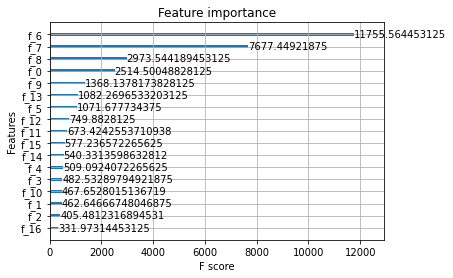

In [16]:
xgb.plot_importance(model, importance_type="gain")

In [17]:
len(oof_df["id"].unique())

15594

In [18]:
len(gt_df["id"].unique())

15594

In [19]:
lvl1_stacking_df.to_parquet("cache_oof2/level1_oof.parquet", index=False)

In [20]:
lvl1_stacking_df.sort_values("prob")

,id,class,prob,predictionstring,overlap
3571,FA20F1758F03,Evidence,0.000010,183,0.007634
3848,F9A5B72FAD82,Evidence,0.000014,597,0.004854
66937,939718B6780D,Evidence,0.000019,47,0.005155
192,FE9AB60822CA,Concluding Statement,0.000020,233,0.022727
86652,7323FA189167,Evidence,0.000020,216,0.003861
...,...,...,...,...,...
57828,86C3CBD25A60,Claim,0.999334,21 22 23 24 25 26 27 28 29,0.888889
94648,3977FF952798,Claim,0.999361,93 94 95 96 97 98 99 100 101 102 103 104 105,0.923077
114932,0EC6CB60A702,Claim,0.999362,44 45 46 47 48 49 50 51 52 53 54 55 56,0.923077
23468,573D3A222492,Concluding Statement,0.999419,420 421 422 423 424 425 426 427 428 429 430 43...,0.892308


<AxesSubplot:xlabel='threshold'>

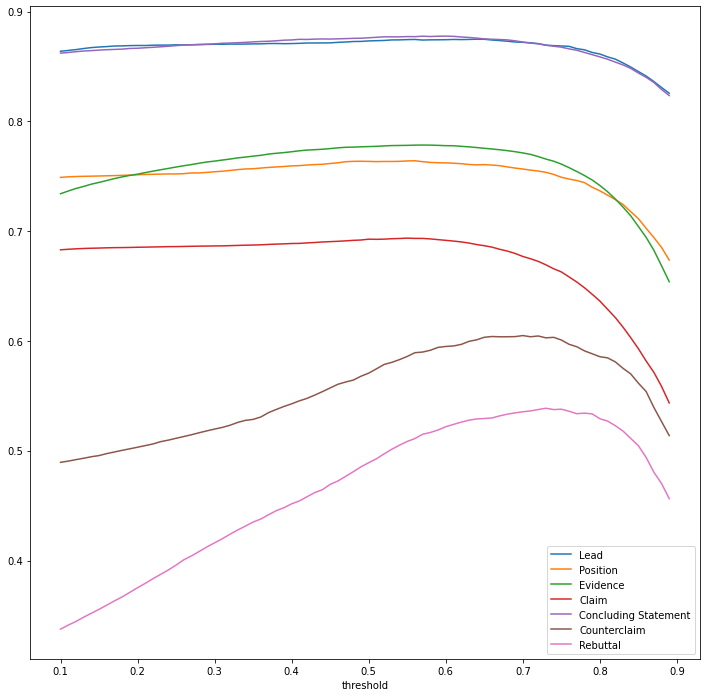

In [21]:
th_df = pd.DataFrame()

for k, v in res.items():
    th_df[k] = v
    
th_df["threshold"] = np.arange(10, 90, 1)/100

th_df.plot(figsize=(12, 12), x="threshold")